In [1]:
from utils import *
from path import *
%matplotlib inline

Using TensorFlow backend.


## 1、分割后的相似率

In [2]:
def simule(lung_100):
    mean = 0.0
    for scan in tqdm(lung_100):
        patient_id = scan.split('/')[-1][:-4]
        img = np.load(scan) 
        mask = np.load(scan.replace("images", "masks"))
        lungmask = np.load(scan.replace("images", "lungmask"))
        img = np.expand_dims(img,1)   
        p = model_fenge.predict(img)
        

        p = np.squeeze(p)
        p=p*lungmask

        #细节参数调整
        
        #p = p*overlap
        #p = morphology.binary_opening(np.squeeze(p), np.ones([3,3,3]))       
        
        mean += dice_coef_np(mask,p)
    mean/=len(lung_100)
    print(u"分割的相似度是：%.6f%%"  %(mean*100))

In [3]:
csv_path = PATH['annotations_train']
model_paths = PATH['model_paths']
working_path = PATH['output_train']
lungs=glob(working_path+"images_*.npy")

In [4]:
learning_rate = 1e-5
model_fenge_path=model_paths + 'kaggle1.h5'
model_fenge = load_model(model_fenge_path, custom_objects={'dice_coef_loss': dice_coef_loss, 'dice_coef': dice_coef})

In [5]:
lung_100 = sorted(np.random.choice(lungs,100))
simule(lung_100)

100%|██████████| 100/100 [00:48<00:00,  2.15it/s]

分割的相似度是：6.963064%


## 2、原始数据、分割后数据的直径分布

In [6]:
import seaborn as sns
sns.set(color_codes=True)#导入seaborn包设定颜色

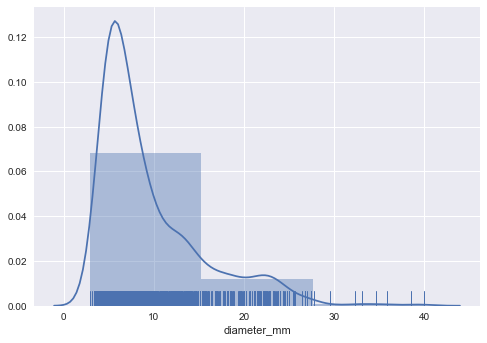

In [7]:
anno_csv = pd.read_csv(PATH['annotations_train'] + 'annotations.csv')
sns.distplot(anno_csv['diameter_mm'], rug=True,bins=3)

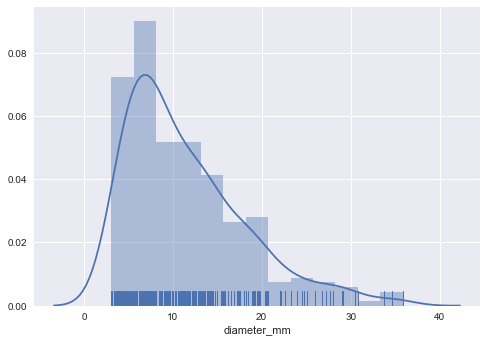

In [8]:
anno_csv1 = pd.read_csv(PATH['annotations_val'] + 'annotations.csv')
sns.distplot(anno_csv1['diameter_mm'], rug=True)